In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [92]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [93]:
plt.style.use("fivethirtyeight")

# EDA part 

In [95]:
df=pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [96]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [97]:
df.info() # total charges is object there are strings inside of it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [98]:
#handle numeric column which seems object
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],"coerce") # coere returns Nan value for string values

In [99]:
df.isnull().sum() #there are 11 NaN value

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [100]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [101]:
df.drop(columns=["customerID"],inplace=True)

# Visualizing 

In [102]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean()) #replace  mean value to Nan values

# Functions to get categoric and numeric columns

In [103]:
def numeric_col(): # takes numerical columns
    num_col=df.select_dtypes(include=["float64","int64","int32"])
    return num_col
def categ_col():
    categ_col=df.select_dtypes(include=["object"])
    return categ_col

In [104]:
categorical_col=categ_col()


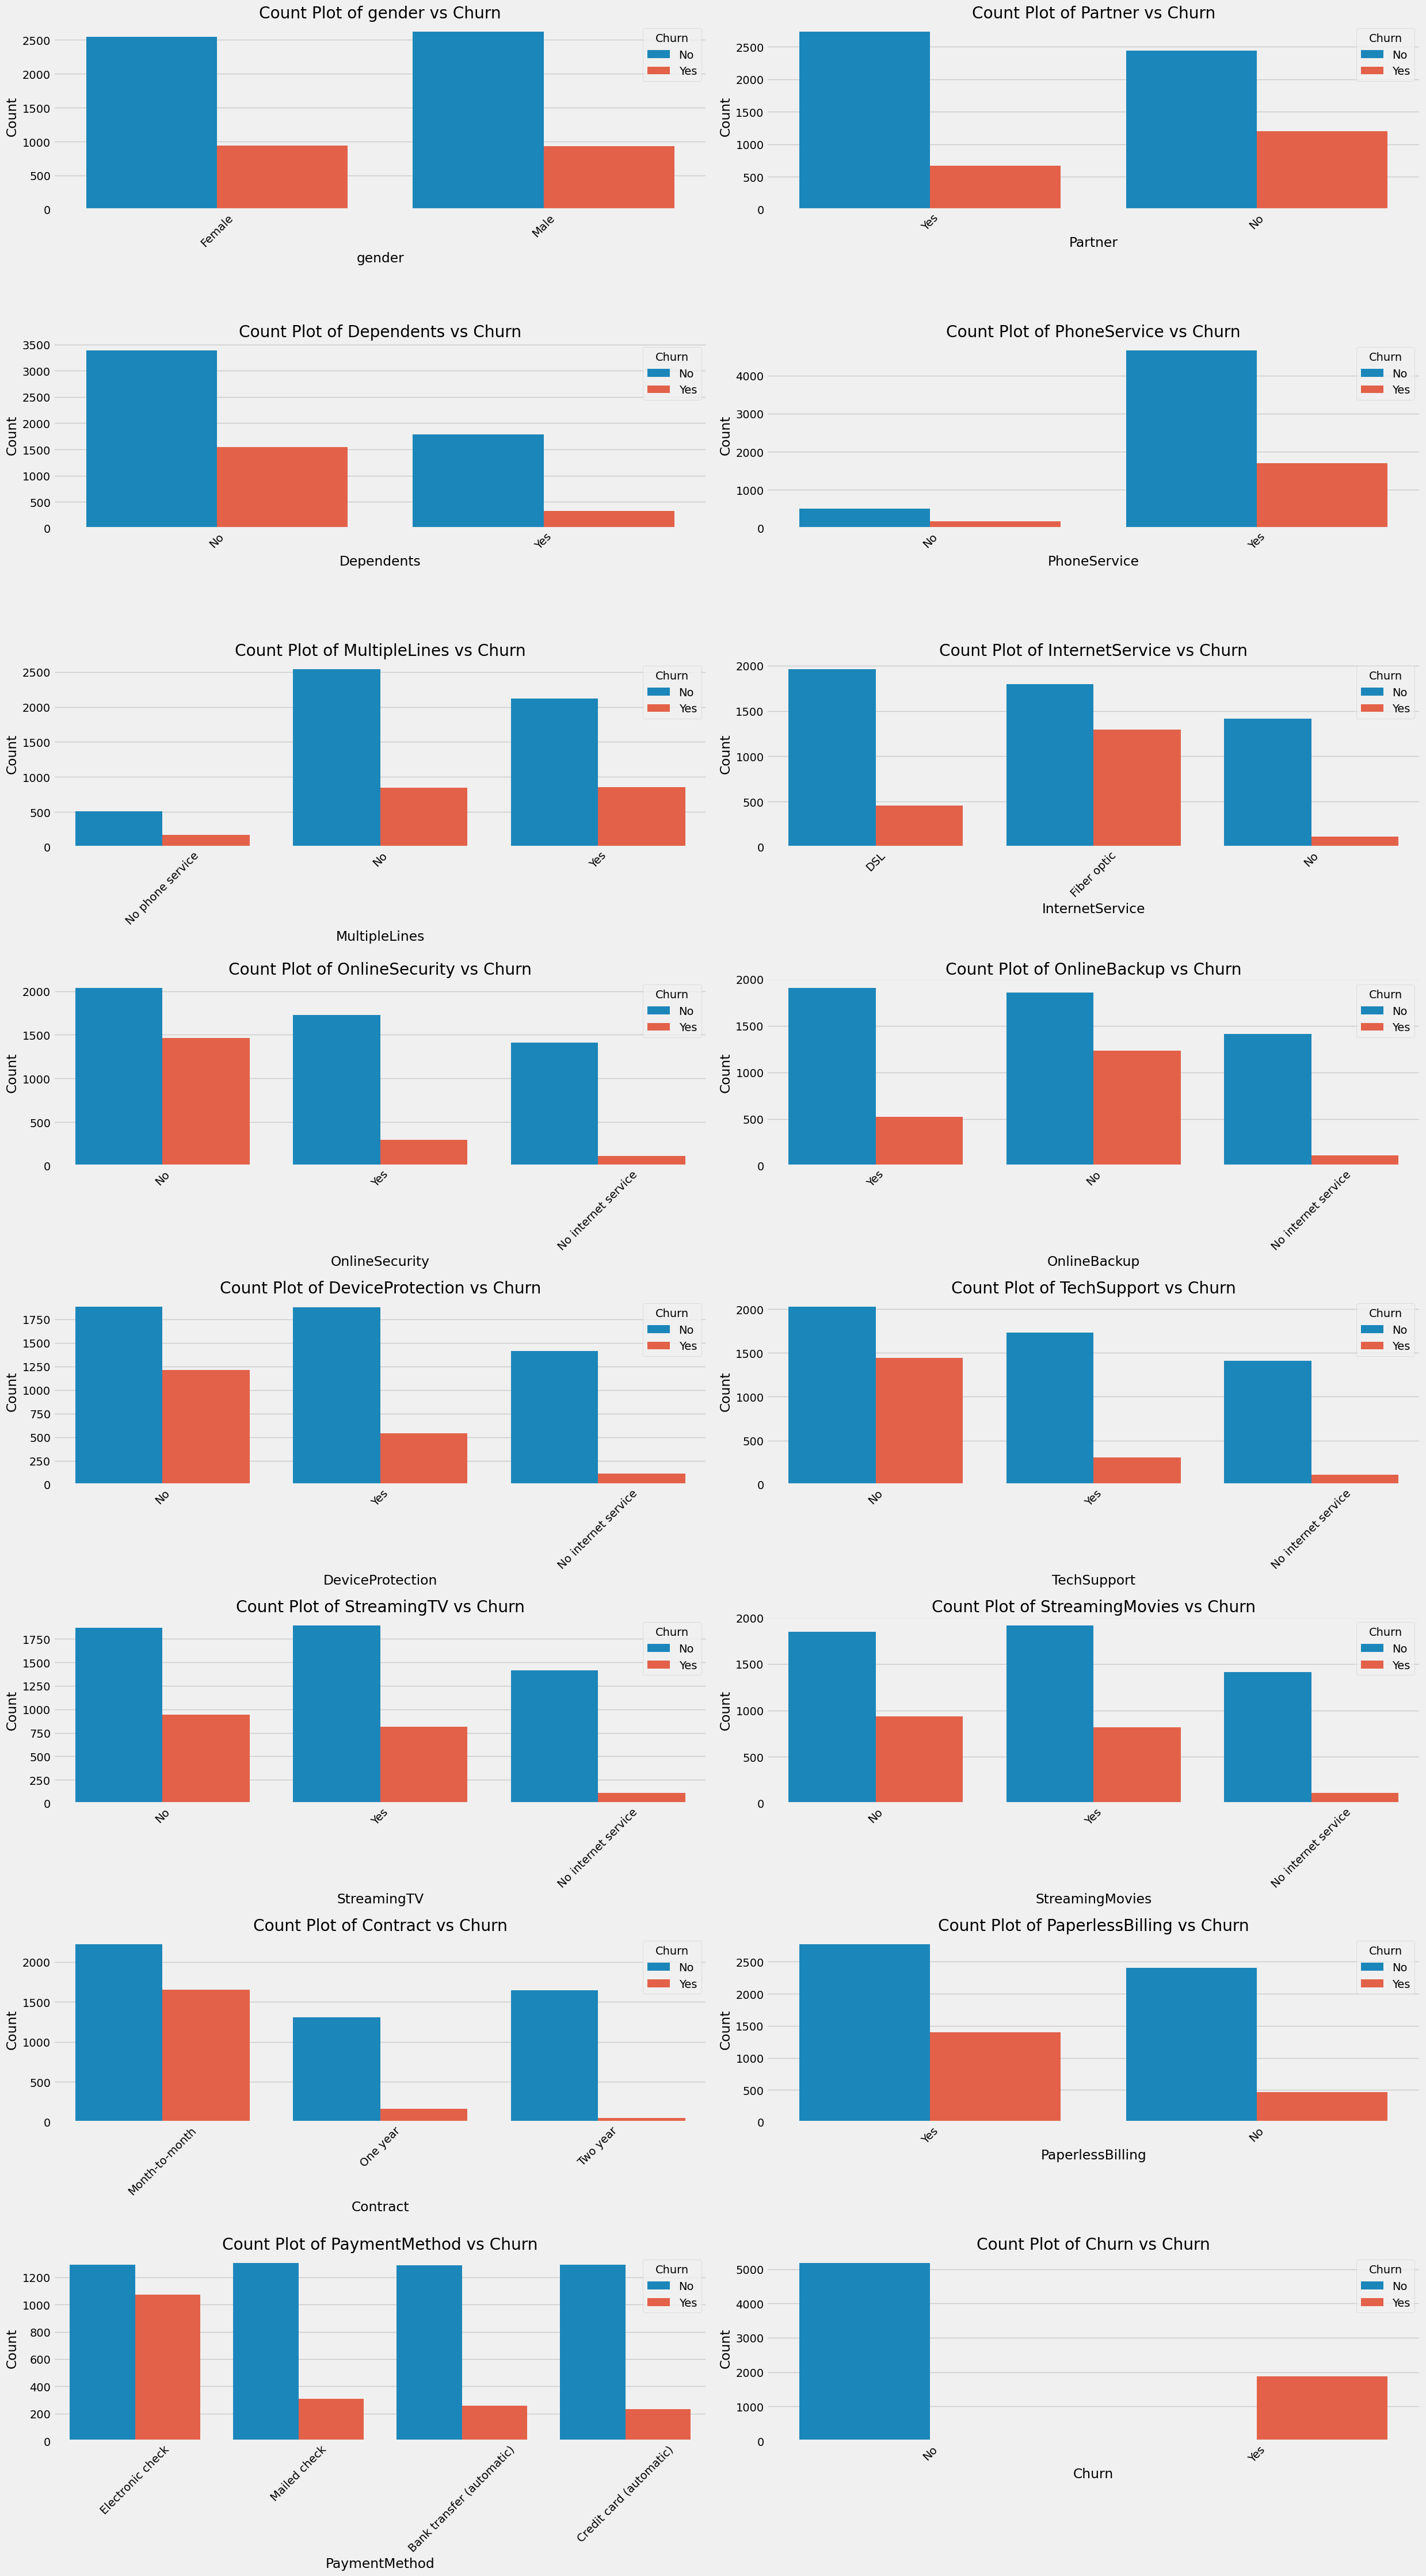

In [105]:

num_plots = len(categorical_col)
fig, axs = plt.subplots(8,2,figsize=(25, 45))  # 6 rows, 2 columns, adjust figsize as needed

# Flatten the 2D array of axs to make it easier to iterate
axs = axs.flatten()
for i, col in enumerate(categorical_col):
    sns.countplot(data=df, x=col, hue='Churn', ax=axs[i])
    axs[i].set_title(f'Count Plot of {col} vs Churn')  # Title for each subplot
    axs[i].set_xlabel(col)  # X-axis label
    axs[i].set_ylabel('Count')  # Y-axis label
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if necessary

plt.tight_layout()

# Show the plots
plt.show()    
    

In [106]:
a=df.groupby("gender")["Churn"].value_counts()
a.index

MultiIndex([('Female',  'No'),
            ('Female', 'Yes'),
            (  'Male',  'No'),
            (  'Male', 'Yes')],
           names=['gender', 'Churn'])

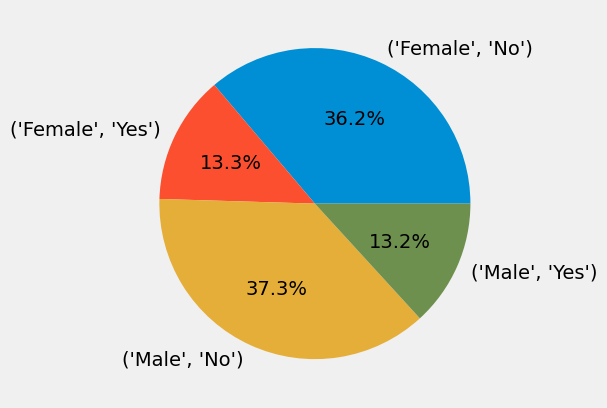

In [107]:
plt.pie(a,labels=a.index,autopct='%1.1f%%') # this shows that number of   churn woman and men equal and they are three times less than not churn customers
plt.show()

<Axes: >

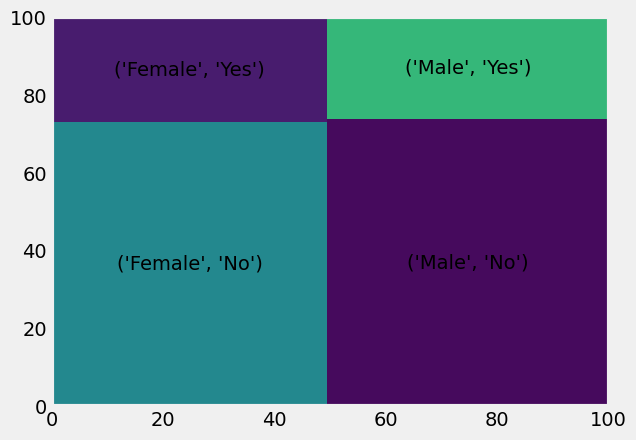

In [108]:
import squarify
squarify.plot(sizes=a, label=a.index,)

In [109]:
df["Churn"]=df["Churn"].replace({"No":0,"Yes":1})


In [110]:
numeric_cols=numeric_col()

<Axes: >

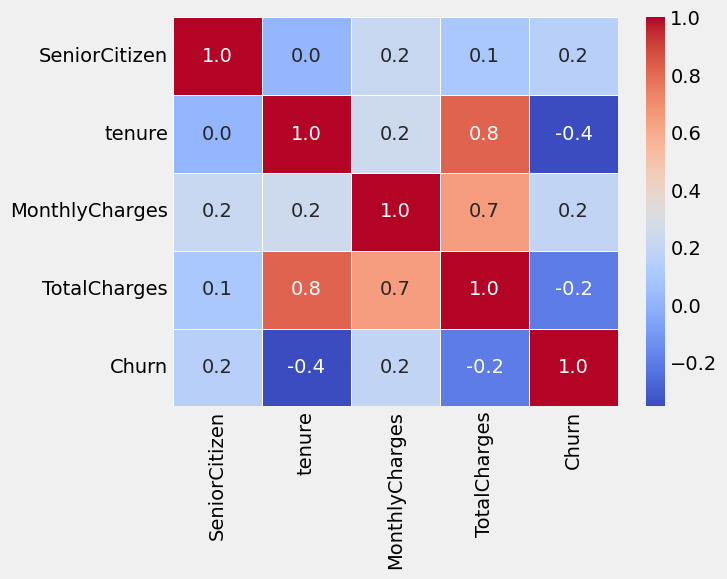

In [111]:
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)

In [112]:
def plot_distribution(df, column_name): #visualize numerical cols
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name], kde = True)
    plt.title(f"Distribution of {column_name}")
    
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    plt.axvline(col_mean, color = "red", linestyle="--", label="Mean")
    plt.axvline(col_median, color = "blue", linestyle="--", label="Median")
    
    plt.legend()
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y  = df[column_name])
    plt.title(f"Boxplot of {column_name}")
    plt.show()

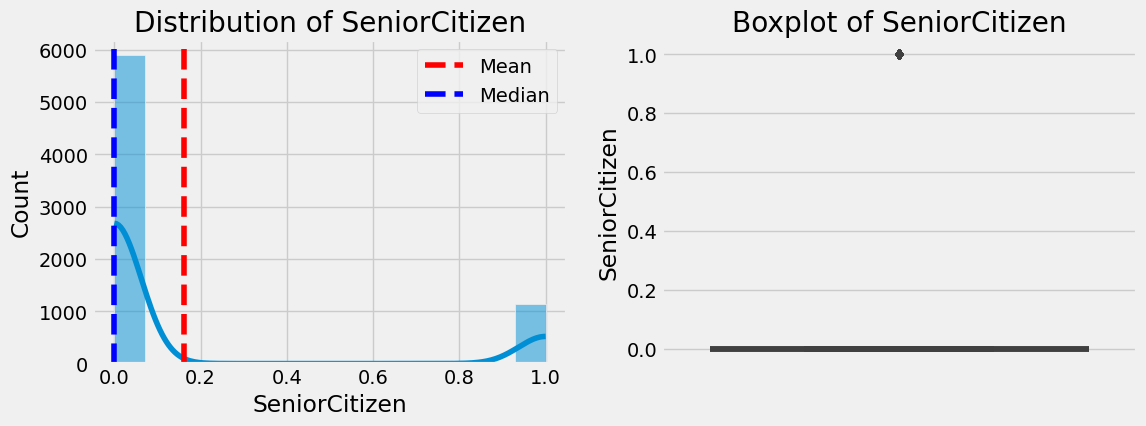

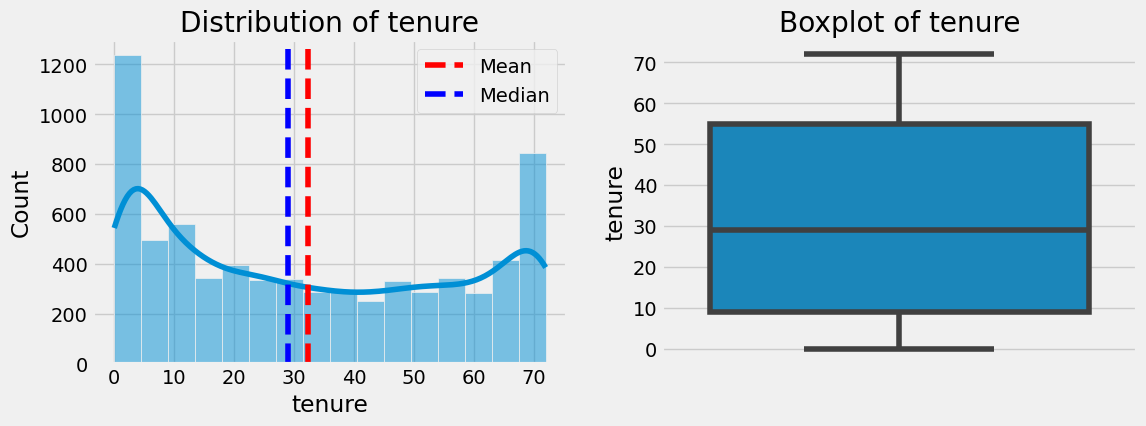

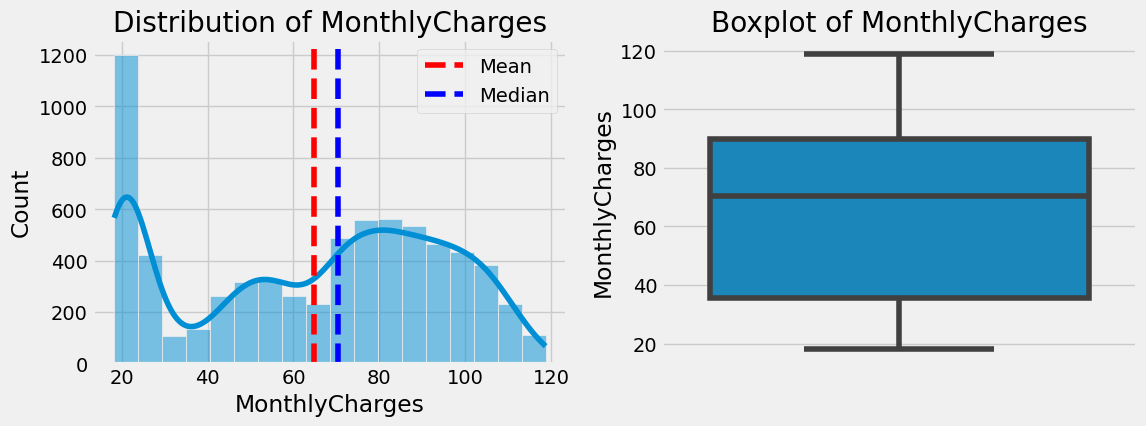

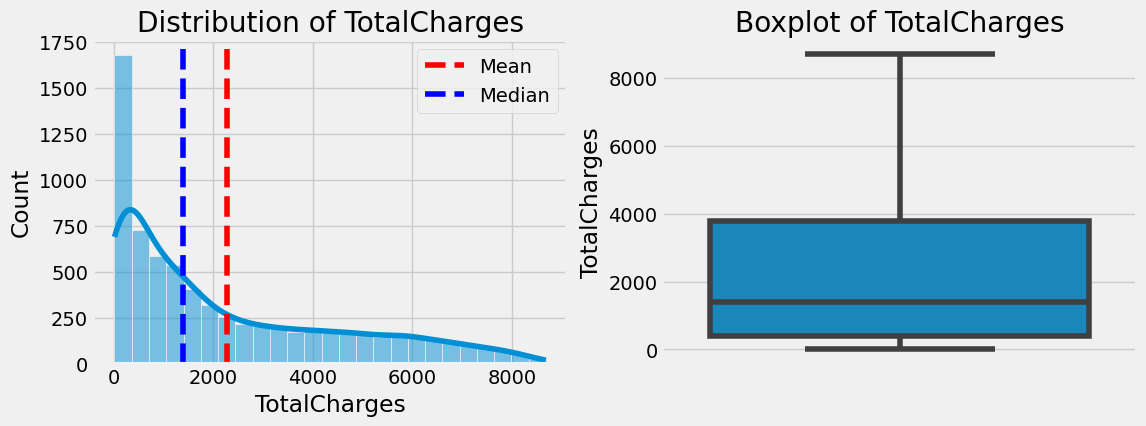

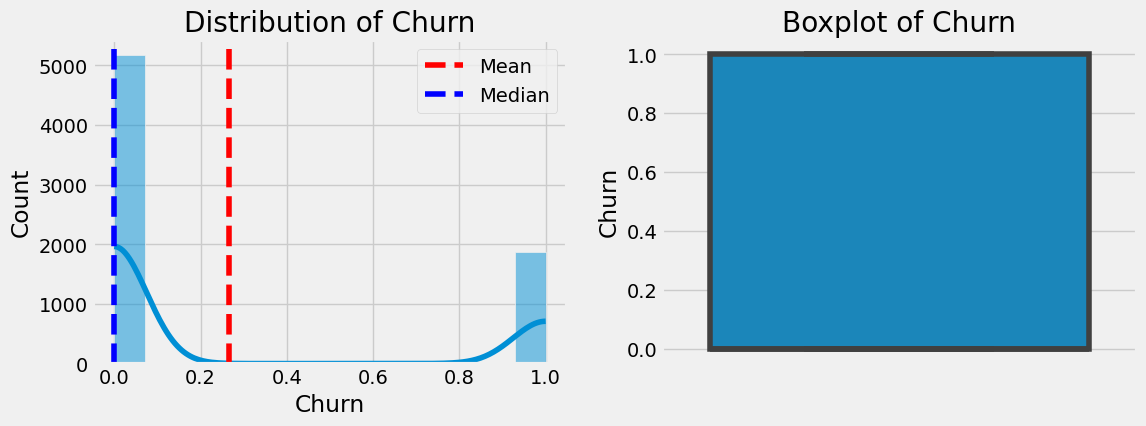

In [113]:
for col in numeric_cols: # outlier control with boxplot
    plot_distribution(df,col)

In [114]:
from sklearn.preprocessing import LabelEncoder

# Preprocessing

In [115]:
from sklearn.preprocessing import StandardScaler  # should be applied after split data as train and test
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [116]:
unique=categ_col().nunique() #number of unique values of object columns



In [117]:
col_le=unique.index[unique==2] # columns for label encoder
col_le


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'], dtype='object')

In [118]:
le=LabelEncoder()
for col in col_le:
    df[col]=le.fit_transform(df[col])

In [119]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [120]:
col_ohe=unique.index[unique !=2] # columns for one hot encoder

In [121]:
col_ohe

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')

# OHE


In [122]:
ohe=OneHotEncoder(sparse_output=False)
df_pandas_encoded = pd.get_dummies(df, columns=col_ohe, drop_first=True) 

In [123]:
df_pandas_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,True,False,True,False,True,True,False,False,False,True
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,False,False,True,False,True,True,False,True,False,False
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,False,False,False,False,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,False,False,False,False,False,False,False,False,False,True


# Turning boolean to 0 or 1

In [124]:
df_pandas_encoded = df_pandas_encoded.astype(int) # turning 0 and 1 boolean columns

In [125]:
dataframe=df_pandas_encoded

# standardization and sampling 

In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [127]:
numerical_cols=["MonthlyCharges","TotalCharges",'tenure']

In [128]:
"""ss=StandardScaler()

df[numerical_cols] = ss.fit_transform(df[numerical_cols])"""

X = dataframe.drop(columns='Churn')  # Features (independent variables)
y = dataframe['Churn']  # Target (dependent variable)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [129]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)


In [130]:
a=df["Churn"].value_counts() #percentage of churn
rate=a[0]/a[1]
rate

2.7683253076511503

In [171]:
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

#  oversampling the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# hyperparameters 
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],

}

#cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)


grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters 
best_params = grid_search.best_params_
print("Best hyperparameters found by GridSearchCV:", best_params)

# Train the model with the best hyperparameters
best_rf = grid_search.best_estimator_
print(best_rf)
# Make predictions 
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]


print("Classification Report:")
print(classification_report(y_test, y_pred))

print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparameters found by GridSearchCV: {'max_depth': None, 'n_estimators': 200}
RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.60      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

F1-Score: 0.5915119363395226
ROC-AUC Score: 0.8396311861459315


In [140]:
best_rf

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [145]:
best_params

{'max_depth': None, 'n_estimators': 200}

In [170]:
from imblearn.over_sampling import SMOTE  #ı added max_depth=10 accuracy increased +1
smote=SMOTE(random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)
rf = RandomForestClassifier(bootstrap=False,class_weight='balanced', random_state=42,max_depth=10,n_estimators=200)
baseline=rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1036
           1       0.57      0.75      0.65       373

    accuracy                           0.79      1409
   macro avg       0.74      0.78      0.75      1409
weighted avg       0.81      0.79      0.79      1409

F1-Score: 0.6511627906976745
ROC-AUC Score: 0.860936578094755


<Axes: >

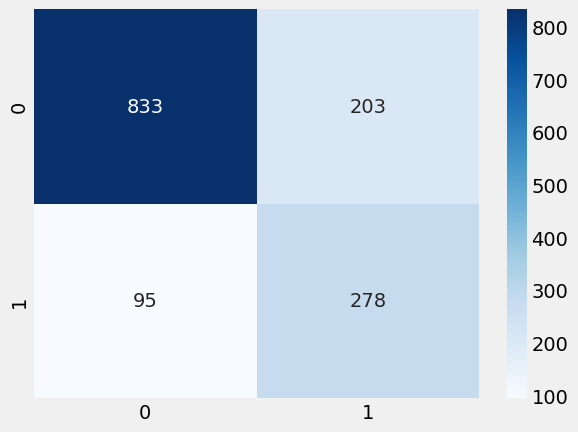

In [164]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")

In [136]:
xgb = XGBClassifier(scale_pos_weight=rate, random_state=42) # with smote success= -4 major class +2 minor class
# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
print(f"Xgboost finding best params......")


grid_search.fit(X_train_smote, y_train_smote)



best_params = grid_search.best_params_
print("Best hyperparameters found by GridSearchCV:", best_params)



best_xgb = grid_search.best_estimator_



y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]


print("Classification Report:")
print(classification_report(y_test, y_pred))

print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Xgboost finding best params......
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found by GridSearchCV: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1036
           1       0.53      0.79      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409

F1-Score: 0.6365591397849462
ROC-AUC Score: 0.8480868363576138


<Axes: >

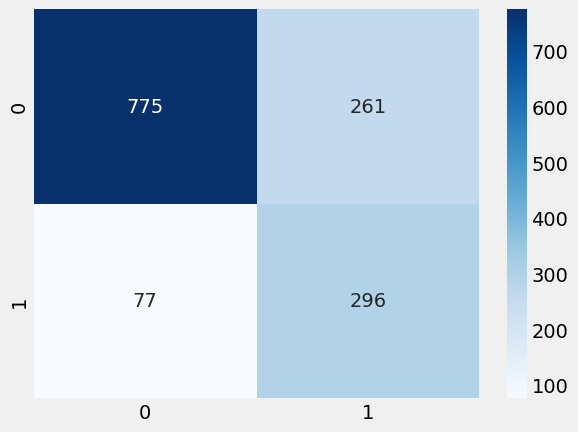

In [137]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")

In [138]:
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64